In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

In [27]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

coordinates = zip(lats, lngs)
cities = []


for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)

In [28]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
city = "Boston"
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    
    city_url = url + weather_api_key + "&q=" + city.replace(" ", "+")
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        city_data.append({
                          "City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                        })
        
    except KeyError:
        print("City not found. Skipping...")
        continue
        
    print(f"Processing record count {record_count} of set {set_count} | {city}")
    record_count += 1
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing record count 1 of set 1 | broken hill
Processing record count 2 of set 1 | kodiak
Processing record count 3 of set 1 | merauke
Processing record count 4 of set 1 | kapaa
Processing record count 5 of set 1 | jiwani
Processing record count 6 of set 1 | kiunga
Processing record count 7 of set 1 | atuona
Processing record count 8 of set 1 | cherskiy
Processing record count 9 of set 1 | mar del plata
City not found. Skipping...
Processing record count 10 of set 1 | visnes
Processing record count 11 of set 1 | longyearbyen
Processing record count 12 of set 1 | tomislavgrad
Processing record count 13 of set 1 | hamilton
City not found. Skipping...
Processing record count 14 of set 1 | hithadhoo
Processing record count 15 of set 1 | tooele
Processing record count 16 of set 1 | san quintin
Processing record count 17 of set 1 | barrow
City not found. Skipping...
Processing record count 18 of set 1 | arraial do cabo
Processing

Processing record count 27 of set 4 | baiao
Processing record count 28 of set 4 | geraldton
Processing record count 29 of set 4 | ust-nera
Processing record count 30 of set 4 | pisco
Processing record count 31 of set 4 | kisanga
Processing record count 32 of set 4 | parsabad
Processing record count 33 of set 4 | waki
Processing record count 34 of set 4 | raga
Processing record count 35 of set 4 | port macquarie
City not found. Skipping...
Processing record count 36 of set 4 | avanigadda
Processing record count 37 of set 4 | ballina
Processing record count 38 of set 4 | kribi
Processing record count 39 of set 4 | port hawkesbury
Processing record count 40 of set 4 | monthey
Processing record count 41 of set 4 | odienne
Processing record count 42 of set 4 | chokurdakh
Processing record count 43 of set 4 | ajdabiya
Processing record count 44 of set 4 | birnin kebbi
Processing record count 45 of set 4 | shingu
Processing record count 46 of set 4 | lopsmarka
City not found. Skipping...
Proc

City not found. Skipping...
Processing record count 12 of set 8 | dunmore town
Processing record count 13 of set 8 | puerto escondido
Processing record count 14 of set 8 | ambilobe
Processing record count 15 of set 8 | leh
Processing record count 16 of set 8 | hobyo
Processing record count 17 of set 8 | kahului
Processing record count 18 of set 8 | takoradi
Processing record count 19 of set 8 | bubaque
City not found. Skipping...
Processing record count 20 of set 8 | saquena
Processing record count 21 of set 8 | tripoli
Processing record count 22 of set 8 | bandarbeyla
Processing record count 23 of set 8 | shitkino
Processing record count 24 of set 8 | narsaq
Processing record count 25 of set 8 | melbu
Processing record count 26 of set 8 | rio do sul
Processing record count 27 of set 8 | lerwick
City not found. Skipping...
Processing record count 28 of set 8 | klaksvik
Processing record count 29 of set 8 | salamiyah
City not found. Skipping...
Processing record count 30 of set 8 | gomb

Processing record count 39 of set 11 | urucara
Processing record count 40 of set 11 | hirara
Processing record count 41 of set 11 | moyale
Processing record count 42 of set 11 | suntar
Processing record count 43 of set 11 | walvis bay
Processing record count 44 of set 11 | tuatapere
Processing record count 45 of set 11 | coronado
Processing record count 46 of set 11 | may pen
Processing record count 47 of set 11 | pingxiang
Processing record count 1 of set 12 | outjo
Processing record count 2 of set 12 | mwinilunga
Processing record count 3 of set 12 | saint george
Processing record count 4 of set 12 | sampit
Processing record count 5 of set 12 | sobolevo
Processing record count 6 of set 12 | sola
Processing record count 7 of set 12 | hammerfest
Processing record count 8 of set 12 | sur
Processing record count 9 of set 12 | stawell
Processing record count 10 of set 12 | isangel
City not found. Skipping...
Processing record count 11 of set 12 | monrovia
Processing record count 12 of set

In [29]:
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Broken Hill,AU,2021-02-25 03:31:05,-31.9500,141.4333,75.20,22,0,16.11
1,Kodiak,US,2021-02-25 03:28:59,57.7900,-152.4072,35.58,74,15,16.35
2,Merauke,ID,2021-02-25 03:31:05,-8.4667,140.3333,82.35,73,86,11.10
3,Kapaa,US,2021-02-25 03:31:05,22.0752,-159.3190,73.99,73,75,17.27
4,Jiwani,PK,2021-02-25 03:31:06,25.0500,61.7417,75.52,70,0,11.79


In [41]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

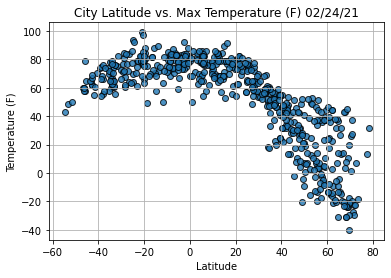

In [44]:
plt.scatter(lats, max_temps, edgecolor="k", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Max Temperature (F) " + time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

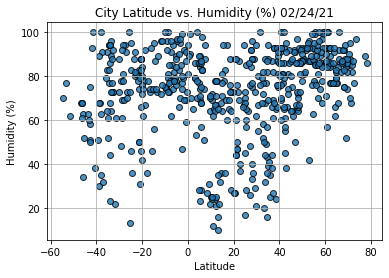

In [45]:
plt.scatter(lats, humidity, edgecolor="k", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) " + time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig2.png")
plt.show()

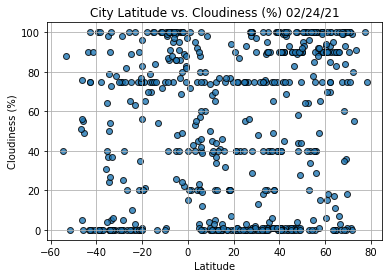

In [46]:
plt.scatter(lats, cloudiness, edgecolor="k", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig3.png")
plt.show()